# Evalvacija iz JSON (napovedi + zlati standard)

Beremo **napovedi ujemanja iz JSON** (npr. `opsi_match.json`) in **zlati standard JSON**.
Nato izračuna **Acc@1**, **P@5** in **MRR**.


In [14]:
# Nastavitve poti (prilagodi)
PREDICTIONS_JSON = "notebook_brezice/result/brezice_match.json"               # <-- tvoj JSON z napovedmi
GOLD_JSON        = "notebook_brezice/gold/trbovlje_to_brezice.json" # <-- tvoj zlati standard
RUN_TAG          = "brezice_json"

TOP_K = 5

# Polja v predictions JSON (po potrebi prilagodi, default za 'opsi_match.json'):
SOURCE_LABEL_FIELD     = "source_label"
SOURCE_FALLBACK_FIELD  = "source_uri"
CANDIDATES_FIELD       = "top_k_matches"
CANDIDATE_LABEL_FIELD  = "label"
CANDIDATE_URI_FIELD    = "uri"
SCORE_FIELD_OPTIONS    = ["combined_score","score"]  # po prioriteti


In [ ]:
from pathlib import Path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt


ImportError: attempted relative import with no known parent package

In [11]:
import sys

sys.path.insert(0, 'notebook_brezice')
from json_eval_helpers import (
    load_predictions_json,
    load_gold_json,
    compute_metrics_from_maps
)

In [15]:
# Naloži top-k mape in zlati standard
topk_map = load_predictions_json(
    PREDICTIONS_JSON,
    source_label_field=SOURCE_LABEL_FIELD,
    source_fallback_field=SOURCE_FALLBACK_FIELD,
    candidates_field=CANDIDATES_FIELD,
    candidate_label_field=CANDIDATE_LABEL_FIELD,
    candidate_uri_field=CANDIDATE_URI_FIELD,
    score_field_options=SCORE_FIELD_OPTIONS,
    top_k=TOP_K,
)
gold_map = load_gold_json(GOLD_JSON)

len(topk_map), len(gold_map)

(7, 8)

In [16]:
# Izračun metrik
res = compute_metrics_from_maps(topk_map, gold_map, k=TOP_K)
summary = {k: v for k, v in res.items() if k in ["count", "acc_at_1", "p_at_5", "mrr"]}
summary

{'count': 8, 'acc_at_1': 0.375, 'p_at_5': 0.07500000000000001, 'mrr': 0.375}

In [17]:
# Detajli po stolpcih
details_df = pd.DataFrame(res["details"])
display(details_df.head(20))

# Shrani rezultate
out_dir = Path("notebook_brezice/results_eval/results_eval_json")
out_dir.mkdir(parents=True, exist_ok=True)
out_csv = out_dir / f"eval_json_details_{RUN_TAG}.csv"
details_df.to_csv(out_csv, index=False, encoding="utf-8")
print("Saved:", out_csv)


,source_column,gold,predictions,hit,rank_hit,hits_in_k
0,Naziv,[lokacija_parkirisca],"[opis lokacije, lokacija parkirisca, Parkrini ...",False,NaN,0
1,Lokacijska koordinata (GMAPS - WGS84),[gps_parkirisca],[],False,NaN,0
2,Plačljivo,[Parkrini režim],"[Parkrini režim, lokacija parkirisca, parkirni...",True,1.0,1
3,Cena,[],"[opis lokacije, Parkrini režim, parkirni prost...",False,NaN,0
4,Število parkirnih mest,[parkirni prostori],"[parkirni prostori, lokacija parkirisca, gps p...",True,1.0,1
5,Električna polnilnica,[],[],False,NaN,0
6,Število mest z električno polnilnico,[],"[parkirni prostori za invalide, parkirni prost...",False,NaN,0
7,Število mest za invalide,[parkirni prostori za invalide],"[parkirni prostori za invalide, opis lokacije,...",True,1.0,1


Saved: notebook_brezice/results_eval/results_eval_json/eval_json_details_brezice_json.csv


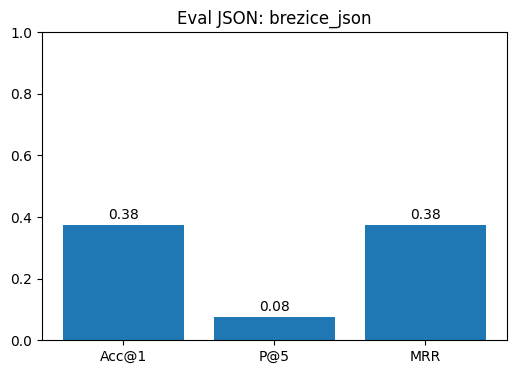

In [18]:
# Preprost graf
plt.figure(figsize=(6,4))
xs = ["Acc@1", "P@5", "MRR"]
ys = [summary["acc_at_1"], summary["p_at_5"], summary["mrr"]]
plt.bar(xs, ys)
plt.ylim(0,1)
plt.title(f"Eval JSON: {RUN_TAG}")
for i, v in enumerate(ys):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.show()
